<a href="https://colab.research.google.com/github/abel-salazar/CienciaDatosPython/blob/main/Proyecto_N%C2%B0_02_Ciencia_Datos_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

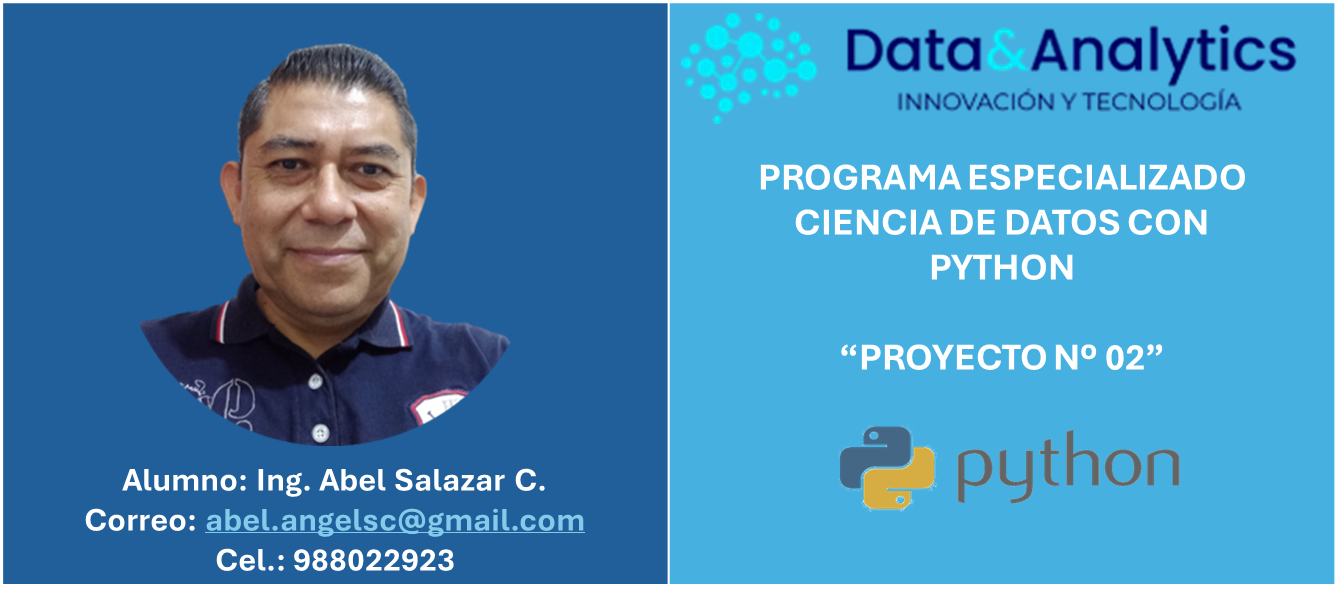

In [3]:
#Importamos las librerias necesarias para el desarrollo de los ejercicios
#Explicacion de cada libreria:
#Pandas: Facilita la manipulación y análisis de datos tabulares en Python mediante DataFrames.
#NumPy: Proporciona estructuras de datos eficientes y funciones para operaciones numéricas avanzadas en Python.
#Matplotlib: Permite crear una amplia variedad de gráficos estáticos de forma sencilla en Python.
#Seaborn: Ofrece una interfaz de alto nivel para crear gráficos estadísticos atractivos y complejos sobre datos en Python.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**Ejercicio N°1:**
Generar una función y utilizar esta para recodificar la variable “país de
origen” (1, 2, 3) en el dataframe a través de la función apply

In [19]:
# Paso 1: Cargar los datos al dataframe df, desde el archivo autos - autos.csv, ubicado en la carpeta.
df = pd.read_csv("/content/sample_data/autos - autos.csv")

In [6]:
# Paso 2: Creamos una funcion de nombre recodificar_pais, que requiere un parametro (valor),
# para recodificar la variable "Pais_Origen" del df
# La funcion contendra una sentencia condicional para comparar el valor del parametro "valor"
# con cada alternativa, y asi poder cambiar su valor según corresponda.
def recodificar_pais(valor):
    if valor == "USA":
        return "USA"
    elif valor == "Japan":
        return "Japan"
    elif valor == "Europe":
        return "Europe"
    else:
        return "Otro"

In [7]:
# Paso 3: Llamamos a la funcion creada, pasandole el parametro "Pais_Origen".
# utilizamos la funcion: apply.
# apply(recodificar_pais) es una forma poderosa de aplicar transformaciones personalizadas a los datos en un DataFrame
# de Pandas, lo que permite la manipulación flexible y eficiente de los datos según las necesidades específicas
# del análisis o procesamiento.
df['Pais_Origen'] = df['Pais_Origen'].apply(recodificar_pais)


In [8]:
# Paso 4: Mostrar resultado modificado. Se imprime la columna 'Pais_Origen' modificada
print(df['Pais_Origen'])

0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
401       USA
402    Europe
403       USA
404       USA
405       USA
Name: Pais_Origen, Length: 406, dtype: object


##**Ejercicio Nº 2**
Generar un Notebook Colab con código y resultados, que contiene
información de autos de un periodo de tiempo. Resolver los siguientes:
- Limpieza y tratamiento de las variables (Según corresponda)
- Generar 5 nuevas variables aplicando los siguientes criterios con las
variables numéricas:
1. Log10(var1/var2)
2. Sqrt(var1)*exp(var2)/200
3. Si var 1 > var 2 → 5, caso contrario 3
4. 1/logn(var1/var2)*100
5. var2**2/var1
6. var1/var2**2

In [9]:
#Utilizamos la libreria numpy y pandas, ya activada en el parrafo inicial; y el archivo csv
#Luego, procedmos a desarrollar el ejercicio 2

# Visualizar las primeras filas del DataFrame para entender la estructura de los datos
print("Datos originales:")
print(df.head())


Datos originales:
   Millas_Por_Galon  Cilindros Pais_Origen  Peso_En_Libras  Desplazamiento  \
0              18.0          8         USA            3504           307.0   
1              15.0          8         USA            3693           350.0   
2              18.0          8         USA            3436           318.0   
3              16.0          8         USA            3433           304.0   
4              17.0          8         USA            3449           302.0   

   Aceleracion                     Nombre        Anyo  Caballo_De_Fuerza  
0         12.0  chevrolet chevelle malibu  01/01/1970              130.0  
1         11.5          buick skylark 320  01/01/1970              165.0  
2         11.0         plymouth satellite  01/01/1970              150.0  
3         12.0              amc rebel sst  01/01/1970              150.0  
4         10.5                ford torino  01/01/1970              140.0  


In [10]:
# Limpieza y tratamiento de variables
# Supongamos que necesitamos tratar valores faltantes o realizar otras operaciones de limpieza

# Identificar valores faltantes en el DataFrame
missing_values = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

# Tratar los valores faltantes según sea necesario
# Opciones incluyen eliminar filas con valores faltantes, reemplazarlos con la media o la mediana, etc.

# Ejemplo: Reemplazar valores faltantes en 'Millas_Por_Galon' con la media
mean_mpg = df['Millas_Por_Galon'].mean()
df['Millas_Por_Galon'].fillna(mean_mpg, inplace=True)

# Ejemplo: Eliminar filas con valores faltantes en otras columnas
df.dropna(subset=['Caballo_De_Fuerza'], inplace=True)

# Visualizar el DataFrame actualizado después de tratar los valores faltantes
print("\nDataFrame después de tratar valores faltantes:")
print(df.head())

Valores faltantes por columna:
Millas_Por_Galon     8
Cilindros            0
Pais_Origen          0
Peso_En_Libras       0
Desplazamiento       0
Aceleracion          0
Nombre               0
Anyo                 0
Caballo_De_Fuerza    6
dtype: int64

DataFrame después de tratar valores faltantes:
   Millas_Por_Galon  Cilindros Pais_Origen  Peso_En_Libras  Desplazamiento  \
0              18.0          8         USA            3504           307.0   
1              15.0          8         USA            3693           350.0   
2              18.0          8         USA            3436           318.0   
3              16.0          8         USA            3433           304.0   
4              17.0          8         USA            3449           302.0   

   Aceleracion                     Nombre        Anyo  Caballo_De_Fuerza  
0         12.0  chevrolet chevelle malibu  01/01/1970              130.0  
1         11.5          buick skylark 320  01/01/1970              165.0  
2      

In [11]:
# Convertir la columna 'Anyo' a formato de fecha
df['Anyo'] = pd.to_datetime(df['Anyo'], errors='coerce')

# Convertir la columna 'Pais_Origen' a tipo categoría si es aplicable
df['Pais_Origen'] = df['Pais_Origen'].astype('category')

# Visualizar el tipo de datos de cada columna después de la conversión
print("\nTipos de datos de cada columna:")
print(df.dtypes)



Tipos de datos de cada columna:
Millas_Por_Galon            float64
Cilindros                     int64
Pais_Origen                category
Peso_En_Libras                int64
Desplazamiento              float64
Aceleracion                 float64
Nombre                       object
Anyo                 datetime64[ns]
Caballo_De_Fuerza           float64
dtype: object


In [12]:
#Otros tratamientos de datos
#Dependiendo de los datos específicos y de los requisitos del análisis, podrías realizar otras transformaciones
#como normalización, codificación de variables categóricas, eliminación de duplicados, etc.
# Ejemplo: Eliminar filas duplicadas (si es necesario)
df.drop_duplicates(inplace=True)

# Ejemplo: Normalizar la columna 'Peso_En_Libras' utilizando una escala específica
df['Peso_En_Libras'] = (df['Peso_En_Libras'] - df['Peso_En_Libras'].min()) / (df['Peso_En_Libras'].max() - df['Peso_En_Libras'].min())

# Ejemplo: Codificar la variable categórica 'Pais_Origen' utilizando one-hot encoding
df = pd.get_dummies(df, columns=['Pais_Origen'])

# Visualizar el DataFrame final después de todas las transformaciones
print("\nDataFrame final después de la limpieza y tratamiento de variables:")
print(df.head())



DataFrame final después de la limpieza y tratamiento de variables:
   Millas_Por_Galon  Cilindros  Peso_En_Libras  Desplazamiento  Aceleracion  \
0              18.0          8        0.536150           307.0         12.0   
1              15.0          8        0.589736           350.0         11.5   
2              18.0          8        0.516870           318.0         11.0   
3              16.0          8        0.516019           304.0         12.0   
4              17.0          8        0.520556           302.0         10.5   

                      Nombre       Anyo  Caballo_De_Fuerza  \
0  chevrolet chevelle malibu 1970-01-01              130.0   
1          buick skylark 320 1970-01-01              165.0   
2         plymouth satellite 1970-01-01              150.0   
3              amc rebel sst 1970-01-01              150.0   
4                ford torino 1970-01-01              140.0   

   Pais_Origen_Europe  Pais_Origen_Japan  Pais_Origen_USA  
0               False   

In [13]:
# Generar 5 nuevas variables según los criterios especificados

# Nueva Variable 1: Logaritmo base 10 de la relación entre Desplazamiento y Cilindros
df['Nueva Variable 1'] = np.log10(df['Desplazamiento'] / df['Cilindros'])

# Nueva Variable 2: Raíz cuadrada de Desplazamiento multiplicada por exponencial de Aceleracion dividida por 200
df['Nueva Variable 2'] = (np.sqrt(df['Desplazamiento']) * np.exp(df['Aceleracion'])) / 200

# Nueva Variable 3: Si Desplazamiento es mayor que Cilindros, asignar 5; de lo contrario, asignar 3
df['Nueva Variable 3'] = np.where(df['Desplazamiento'] > df['Cilindros'], 5, 3)

# Nueva Variable 4: Cálculo especial utilizando logaritmo natural y multiplicación por 100
df['Nueva Variable 4'] = 1 / np.log(df['Desplazamiento'] / df['Cilindros']) * 100

# Nueva Variable 5: Cuadrado de Cilindros dividido por Desplazamiento
df['Nueva Variable 5'] = df['Cilindros']**2 / df['Desplazamiento']

# Nueva Variable 6: Desplazamiento dividido por el cuadrado de Cilindros
df['Nueva Variable 6'] = df['Desplazamiento'] / df['Cilindros']**2

# Visualizar las nuevas variables y el DataFrame resultante
print("\nDataFrame con nuevas variables:")
print(df.head())


DataFrame con nuevas variables:
   Millas_Por_Galon  Cilindros  Peso_En_Libras  Desplazamiento  Aceleracion  \
0              18.0          8        0.536150           307.0         12.0   
1              15.0          8        0.589736           350.0         11.5   
2              18.0          8        0.516870           318.0         11.0   
3              16.0          8        0.516019           304.0         12.0   
4              17.0          8        0.520556           302.0         10.5   

                      Nombre       Anyo  Caballo_De_Fuerza  \
0  chevrolet chevelle malibu 1970-01-01              130.0   
1          buick skylark 320 1970-01-01              165.0   
2         plymouth satellite 1970-01-01              150.0   
3              amc rebel sst 1970-01-01              150.0   
4                ford torino 1970-01-01              140.0   

   Pais_Origen_Europe  Pais_Origen_Japan  Pais_Origen_USA  Nueva Variable 1  \
0               False              False

##**Ejercicio Nº 3**
Crear una función que permita generar 3 variables cualitativas
ordinales a partir de las variables numéricas con los siguientes criterios:
★ Si es mayor a la “media + 1*desviación estándar” → Alto

★ Si está entre “media - 1*desviación estándar” y “media +
1*desviación estándar” → Medio

★ Si es menor a la “media - 1*desviación estándar” → Bajo

Nota:
 - Mostrar con las nuevas variables generadas.
 - Elegir con libertad las variables a trabajar.

La función debe contar con su respectiva documentación.

In [14]:
# Utilizamos la libreria pandad y numpy, ya activadas en el parrafo inicial.
# Utilizamos el conjunto de datos autos - autos.csv, ya cargado previamente
# Definimos la funcion solicitada para este ejercicio.

def generar_variables_cualitativas_ordinales(df, variables):
    """
    Esta función genera tres variables cualitativas ordinales a partir de las variables numéricas especificadas en 'variables'.

    Para cada variable numérica, se aplican los siguientes criterios:
    - 'Alto': si el valor es mayor que la media + 1 desviación estándar.
    - 'Medio': si el valor está entre la media - 1 desviación estándar y la media + 1 desviación estándar.
    - 'Bajo': si el valor es menor que la media - 1 desviación estándar.

    Args:
    df (DataFrame): DataFrame que contiene las variables de interés.
    variables (list): Lista de nombres de columnas con variables numéricas en el DataFrame.

    Returns:
    DataFrame: DataFrame actualizado con tres nuevas columnas que representan las variables cualitativas ordinales generadas.
    """
    df_new = df.copy()  # Copia del DataFrame original

    for variable in variables:
        media = df_new[variable].mean()
        std_dev = df_new[variable].std()

        # Generar nombres de las nuevas variables
        alto_col = f'{variable}_Alto'
        medio_col = f'{variable}_Medio'
        bajo_col = f'{variable}_Bajo'

        # Aplicar condiciones para generar las nuevas variables
        df_new[alto_col] = np.where(df_new[variable] > (media + std_dev), 'Alto', 'NoAlto')
        df_new[medio_col] = np.where((df_new[variable] >= (media - std_dev)) & (df_new[variable] <= (media + std_dev)), 'Medio', 'NoMedio')
        df_new[bajo_col] = np.where(df_new[variable] < (media - std_dev), 'Bajo', 'NoBajo')

    return df_new

In [15]:
# Ejemplo de uso:
# Supongamos que 'data' es tu DataFrame y 'vars_to_process' es la lista de columnas numéricas a procesar
data = {
    'Variable1': [10, 15, 20, 5],
    'Variable2': [25, 30, 35, 20],
    'Variable3': [12, 18, 25, 8]
}
df = pd.DataFrame(data)

# Lista de variables numéricas a procesar
vars_to_process = ['Variable1', 'Variable2', 'Variable3']

# Aplicar la función para generar las variables cualitativas ordinales
df_with_qualitative = generar_variables_cualitativas_ordinales(df, vars_to_process)

# Mostrar las variables
print(df_with_qualitative)

   Variable1  Variable2  Variable3 Variable1_Alto Variable1_Medio  \
0         10         25         12         NoAlto           Medio   
1         15         30         18         NoAlto           Medio   
2         20         35         25           Alto         NoMedio   
3          5         20          8         NoAlto         NoMedio   

  Variable1_Bajo Variable2_Alto Variable2_Medio Variable2_Bajo Variable3_Alto  \
0         NoBajo         NoAlto           Medio         NoBajo         NoAlto   
1         NoBajo         NoAlto           Medio         NoBajo         NoAlto   
2         NoBajo           Alto         NoMedio         NoBajo           Alto   
3           Bajo         NoAlto         NoMedio           Bajo         NoAlto   

  Variable3_Medio Variable3_Bajo  
0           Medio         NoBajo  
1           Medio         NoBajo  
2         NoMedio         NoBajo  
3         NoMedio           Bajo  


##**Ejercicio Nº 4**
Crear una función en Python que muestre los siguientes gráficos
(simultáneamente) para las variables numéricas, según una variable
cualitativa:

❖ Cajas y bigotes

❖ Barras de la media

❖ Histograma con densidad (Curva)

❖ Gráfico de mapa de calor de la media de una tabla de
contingencia (doble entrada)

● La función debe contar con su respectiva documentación.


In [12]:
#Uitlizamos las librerias que hemos cargado previamente, al inicio
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

# Definir la función para mostrar gráficos de variables numéricas
def mostrar_graficos_variables_numericas(df, variable_cualitativa):
    """
    Muestra gráficos simultáneos para variables numéricas según una variable cualitativa.

    Parámetros:
    df (DataFrame): DataFrame que contiene los datos.
    variable_cualitativa (str): Nombre de la columna que contiene la variable cualitativa.

    Ejemplo:
    mostrar_graficos_variables_numericas(df, 'Pais_Origen')
    """
    # Filtrar columnas numéricas
    columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Filtrar columnas numéricas que no sean la variable cualitativa
    columnas_numericas = [col for col in columnas_numericas if col != variable_cualitativa]

    # Crear subplots para los gráficos
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))

    # Gráfico de cajas y bigotes
    sns.boxplot(x=variable_cualitativa, y=columnas_numericas[0], data=df, ax=axs[0, 0])
    axs[0, 0].set_title('Cajas y Bigotes')

    # Gráfico de barras de la media
    sns.barplot(x=variable_cualitativa, y=columnas_numericas[1], data=df, ax=axs[0, 1], estimator=np.mean)
    axs[0, 1].set_title('Barras de la Media')

    # Histograma con densidad
    sns.histplot(df, x=columnas_numericas[2], hue=variable_cualitativa, kde=True, ax=axs[1, 0])
    axs[1, 0].set_title('Histograma con Densidad')

    # Mapa de calor de la media de una tabla de contingencia
    heatmap_data = df.groupby(variable_cualitativa)[columnas_numericas[3]].mean().reset_index()
    heatmap_data = heatmap_data.pivot(index=variable_cualitativa, columns=columnas_numericas[3], values=columnas_numericas[3])
    sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", ax=axs[1, 1])
    axs[1, 1].set_title('Mapa de Calor de la Media')

    # Ajustar el diseño de los subplots
    plt.tight_layout()

    # Mostrar los gráficos
    plt.show()

In [13]:
# Paso 1: Cargar los datos al dataframe df, desde el archivo autos - autos.csv, ubicado en la carpeta.
df = pd.read_csv("/content/sample_data/autos - autos.csv")

In [14]:
# Convertir columnas numéricas al tipo adecuado
numeric_columns = df.columns.drop('Pais_Origen').tolist()
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

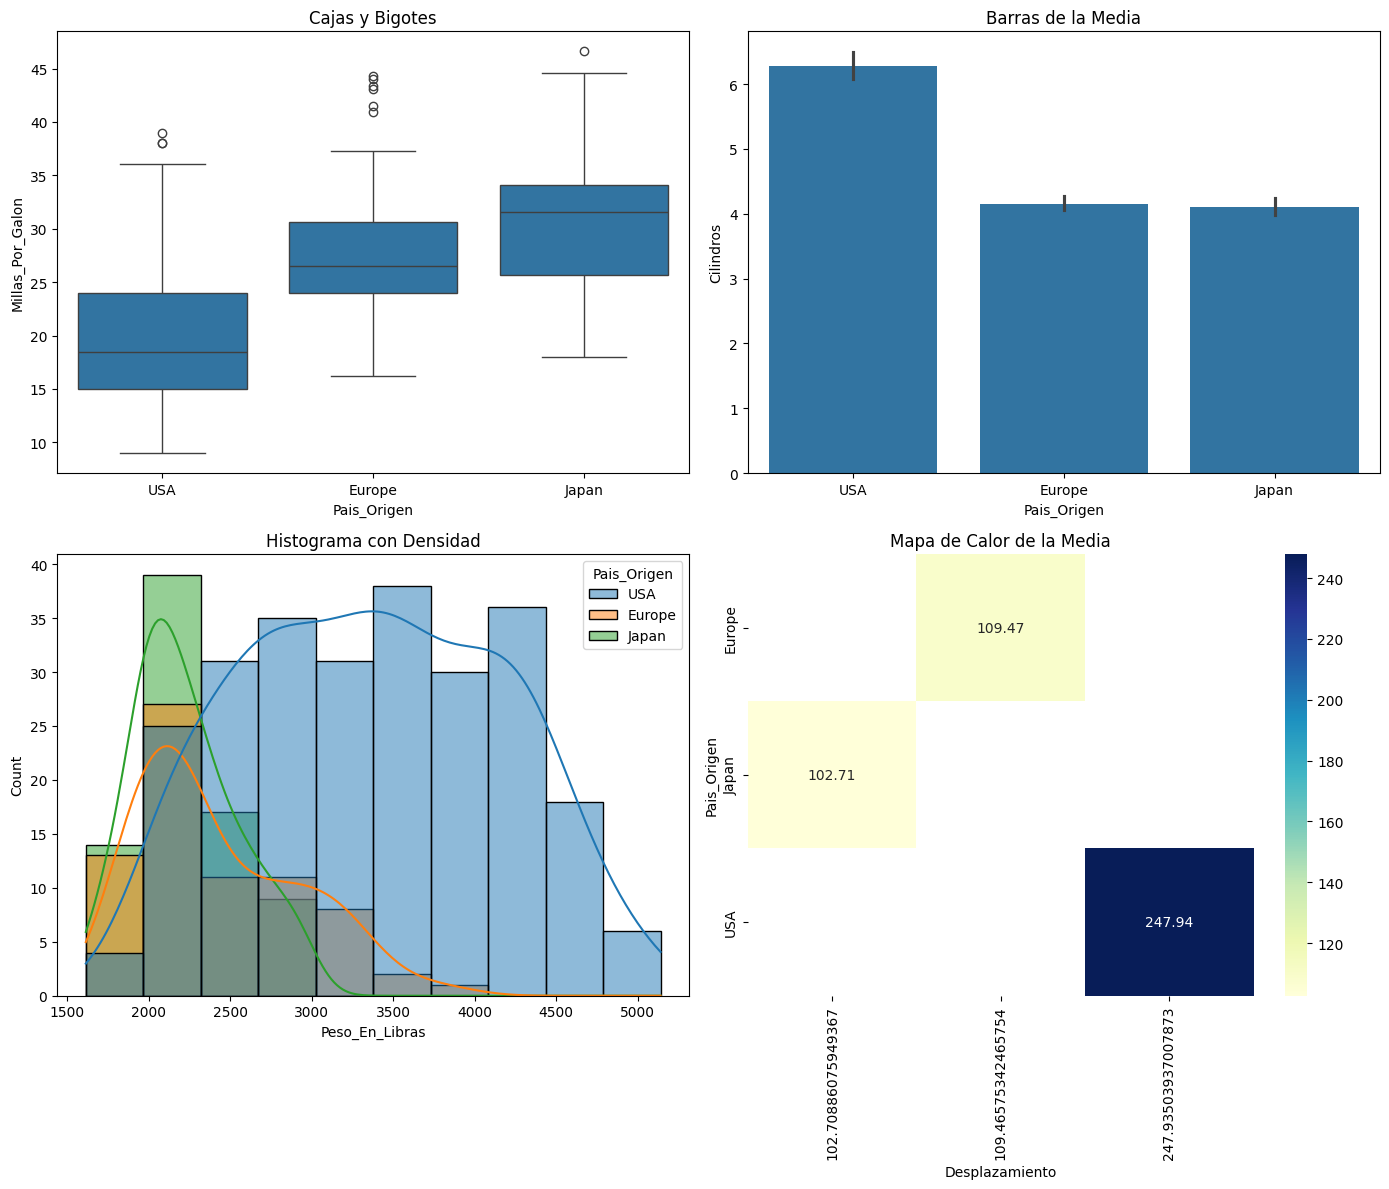

In [15]:
# Usar la función para mostrar los gráficos agrupados por 'Pais_Origen'
mostrar_graficos_variables_numericas(df, 'Pais_Origen')

##**Ejercicio Nº 5**
Crear una función en Python que devuelva un mapa de calor con la
correlación de todas las variables numéricas (incluye las generadas),
según país.

● La función debe contar con su respectiva documentación.

Para el desarrollo del ejercicio 4, vamos a seguir los siguientes pasos para cear la función:

**Filtrar y Preparar los Datos:**
  - Filtrar las columnas numéricas del DataFrame.
  - Asegurarnos de que las variables numéricas incluyan las generadas.

**Agrupar por País:**
  - Agrupar los datos por la columna 'Pais_Origen'.

**Calcular la Correlación:**
  - Calcular la matriz de correlación para cada grupo (país).

**Generar el Mapa de Calor:**
  - Utilizar la matriz de correlación calculada para visualizar un mapa de calor.

In [16]:
# Cargamos las librerias que se necesitaran
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Creamos la funcion necesaria: mapa_calor_correlacion_por_pais, que recibira como parametro el DataFrame (df)

def mapa_calor_correlacion_por_pais(df):
    """
    Genera un mapa de calor que muestra la correlación de todas las variables numéricas por país.

    Parámetros:
    df (DataFrame): DataFrame que contiene los datos, incluyendo las variables numéricas y la columna 'Pais_Origen'.

    Ejemplo:
    mapa_calor_correlacion_por_pais(df)
    """
    # Filtrar columnas numéricas
    columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Agrupar por país y calcular la matriz de correlación para cada grupo
    correlaciones_por_pais = df.groupby('Pais_Origen')[columnas_numericas].corr()

    # Generar el mapa de calor de la correlación por país
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlaciones_por_pais, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Mapa de Calor de Correlación por País')
    plt.xlabel('Variables Numéricas')
    plt.ylabel('País')
    plt.show()

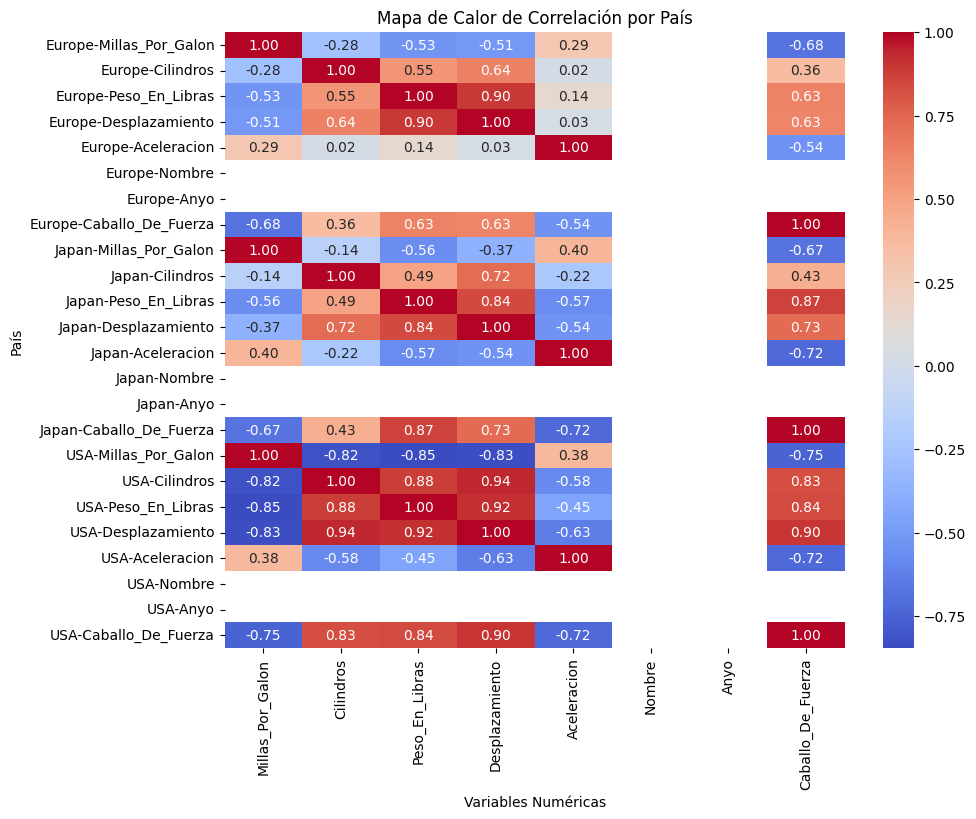

In [18]:
# Llammamos a nuestra funcion, pasando el parametro necesario
mapa_calor_correlacion_por_pais(df)